# Data Visualisation, Final Project: Scottish Haggis Data Mining
## Stage 1: Exploratory Data Analysis (EDA)

**Student Name:** Ahmed Ikram
**Date:** December 2025

---

### Objective
The goal of this stage is to prepare the `scottish_haggis_2025.csv` dataset for modeling. We will inspect the data, visualize distributions and relationships, clean anomalies, engineer new features, and perform dimensionality reduction (PCA) to gain deeper insights.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


## 1.1. Data Loading & Initial Inspection
We load and have an quick look at the data

In [55]:
# Load the dataset
df = pd.read_csv('scottish_haggis_2025.csv')

# Display first few rows
display(df.head())


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


In [56]:
# Display data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [57]:
# Summary statistics
display(df.describe())


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


### Initial Observations
- The dataset contains 344 entries.
- **Missing Values**: There are missing values in `nose_length_mm`, `eye_size_mm`, `tail_length_mm`, `body_mass_g`, and `sex`. We need to investigate if these are random or structural.
- **Data Types**: `species`, `island`, and `sex` are categorical (object). The rest are numeric.
- **Scales**: Features have different scales (e.g., `body_mass_g` in thousands vs `eye_size_mm` in tens), suggesting scaling will be necessary for distance-based algorithms.


## 1.2. Exploratory Data Analysis (EDA)
We visualize distributions to understand the data structure and identify separability between species.


### Bar Plots: Categorical Feature Distributions
Visualizing the distribution of categorical features (`species`, `island`, `sex`) to assess class balance and sample sizes.

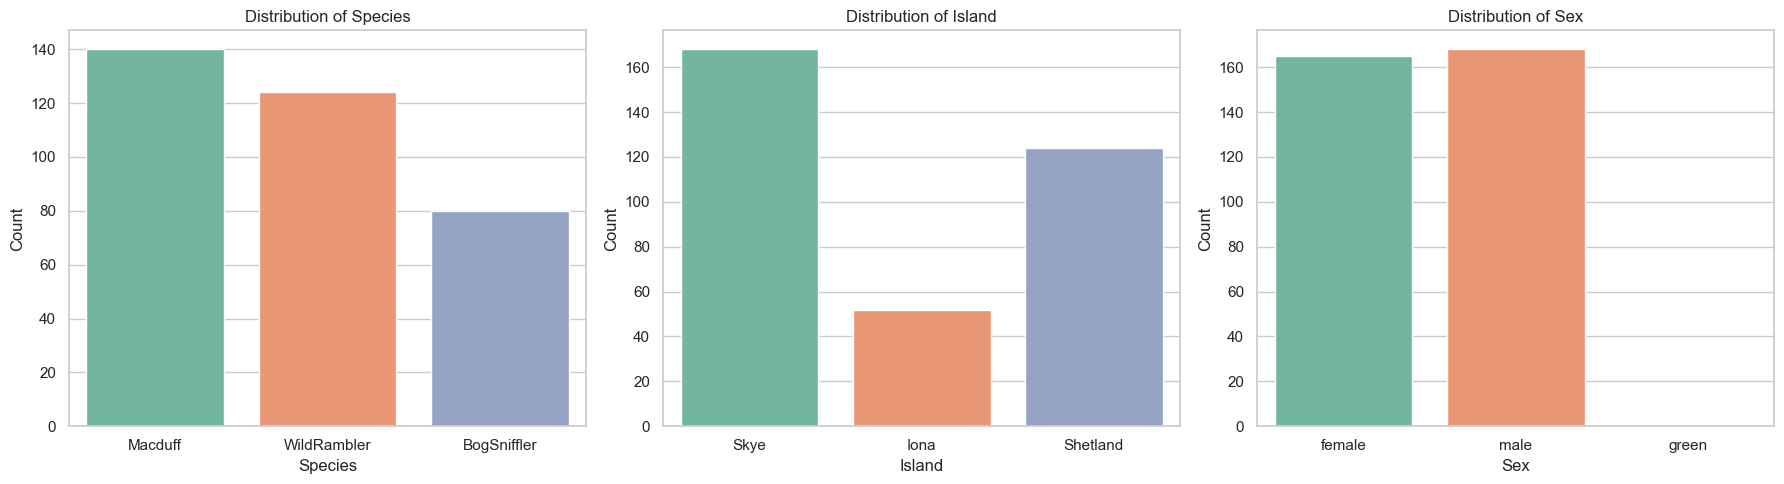

In [58]:
# Bar plots for categorical features
categorical_cols = ['species', 'island', 'sex']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue=col, data=df, ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(f'Distribution of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

#### Data Visualisation Commentary: Bar Plots of Categorical Features
- The bar plots show the sample sizes for each `species`, `island`, and `sex`.
- This helps confirm whether the dataset is balanced or imbalanced across classes, which is important for model evaluation and interpretation.
- Any significant imbalance should be noted and considered in later modeling stages.

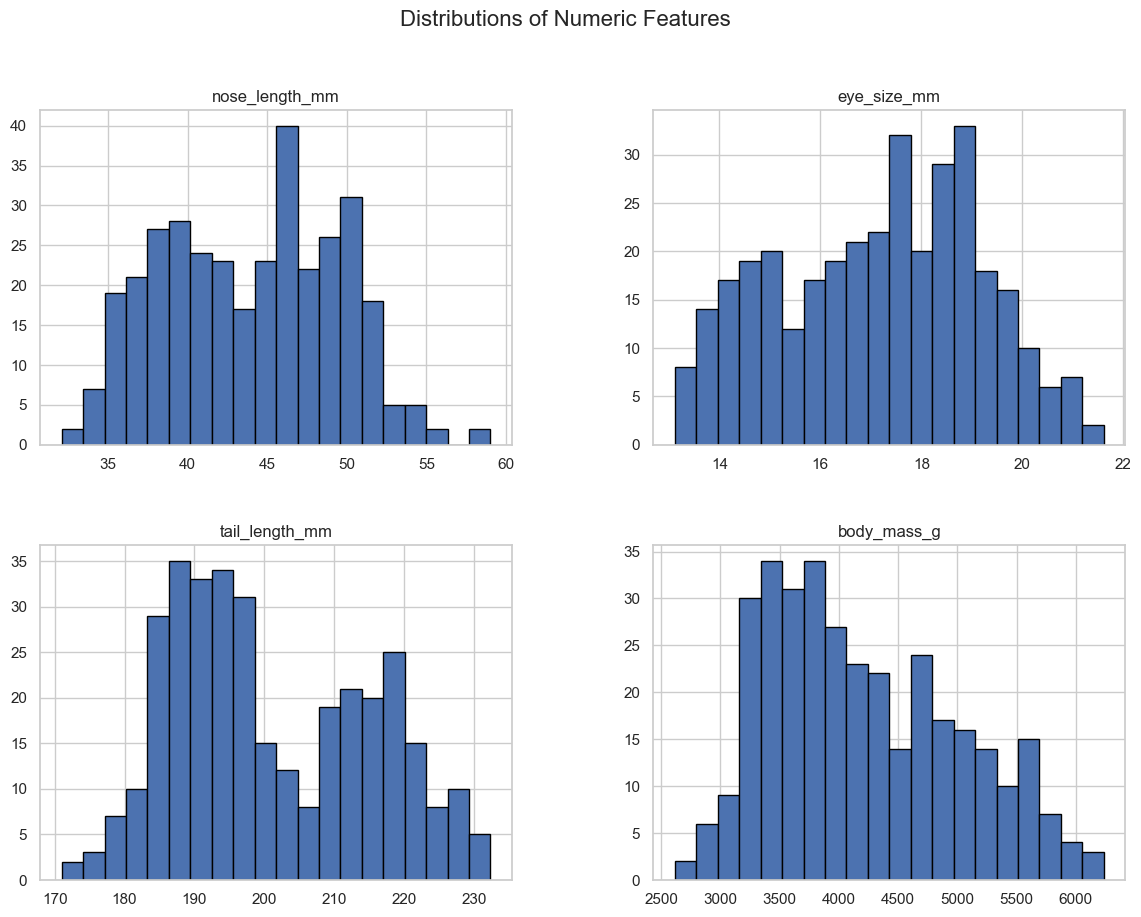

In [59]:
# Histograms of numeric features to show distributions
numeric_cols = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']
df[numeric_cols].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Distributions of Numeric Features', fontsize=16)
plt.show()


#### Data Visualisation Commentary: Histograms of Numeric Features
- `nose_length_mm` and `eye_size_mm` both show unimodal, roughly symmetric distributions, with most values concentrated in the mid-range. There is a slight right skew in `nose_length_mm`, suggesting a few individuals with longer noses.
- `tail_length_mm` and `body_mass_g` both display evidence of bimodality, with two distinct peaks. This likely reflects the presence of two or more species with different size characteristics.
- The spread of `body_mass_g` is much larger than the other features, indicating the need for scaling before applying distance-based algorithms.
- No extreme outliers are visible in the histograms, supporting the later finding that the dataset is relatively homogeneous.

### Boxplots: Numeric Features by Species
Boxplots allow us to compare the distribution and spread of each numeric feature across the different haggis species, and to visually identify outliers.

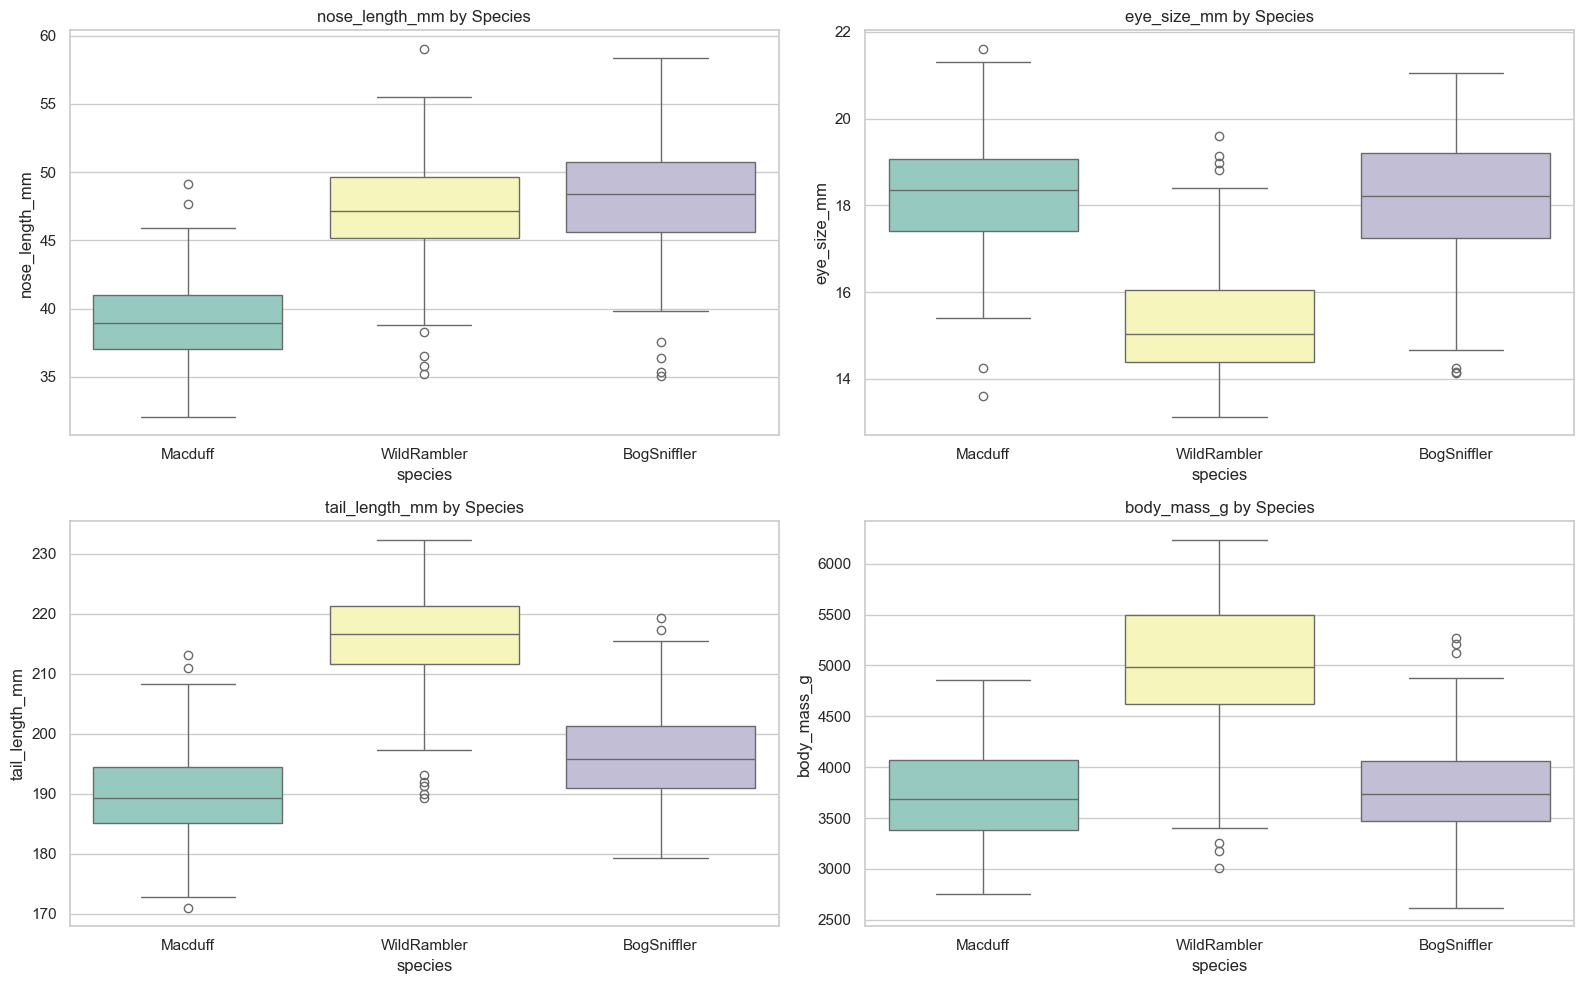

In [60]:
# Boxplots for numeric features by species
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='species', y=col, hue='species', data=df, ax=axes[i//2, i%2], palette='Set3', legend=False)
    axes[i//2, i%2].set_title(f'{col} by Species')
plt.tight_layout()
plt.show()

#### Data Visualisation Commentary: Boxplots by Species
- The boxplots show how each numeric feature varies across the three haggis species.
- Differences in medians and interquartile ranges highlight which features are most useful for distinguishing species.
- Outliers, if present, are visible as points outside the whiskers and may indicate rare or unusual individuals.
- These plots support feature selection and modeling decisions in later stages.

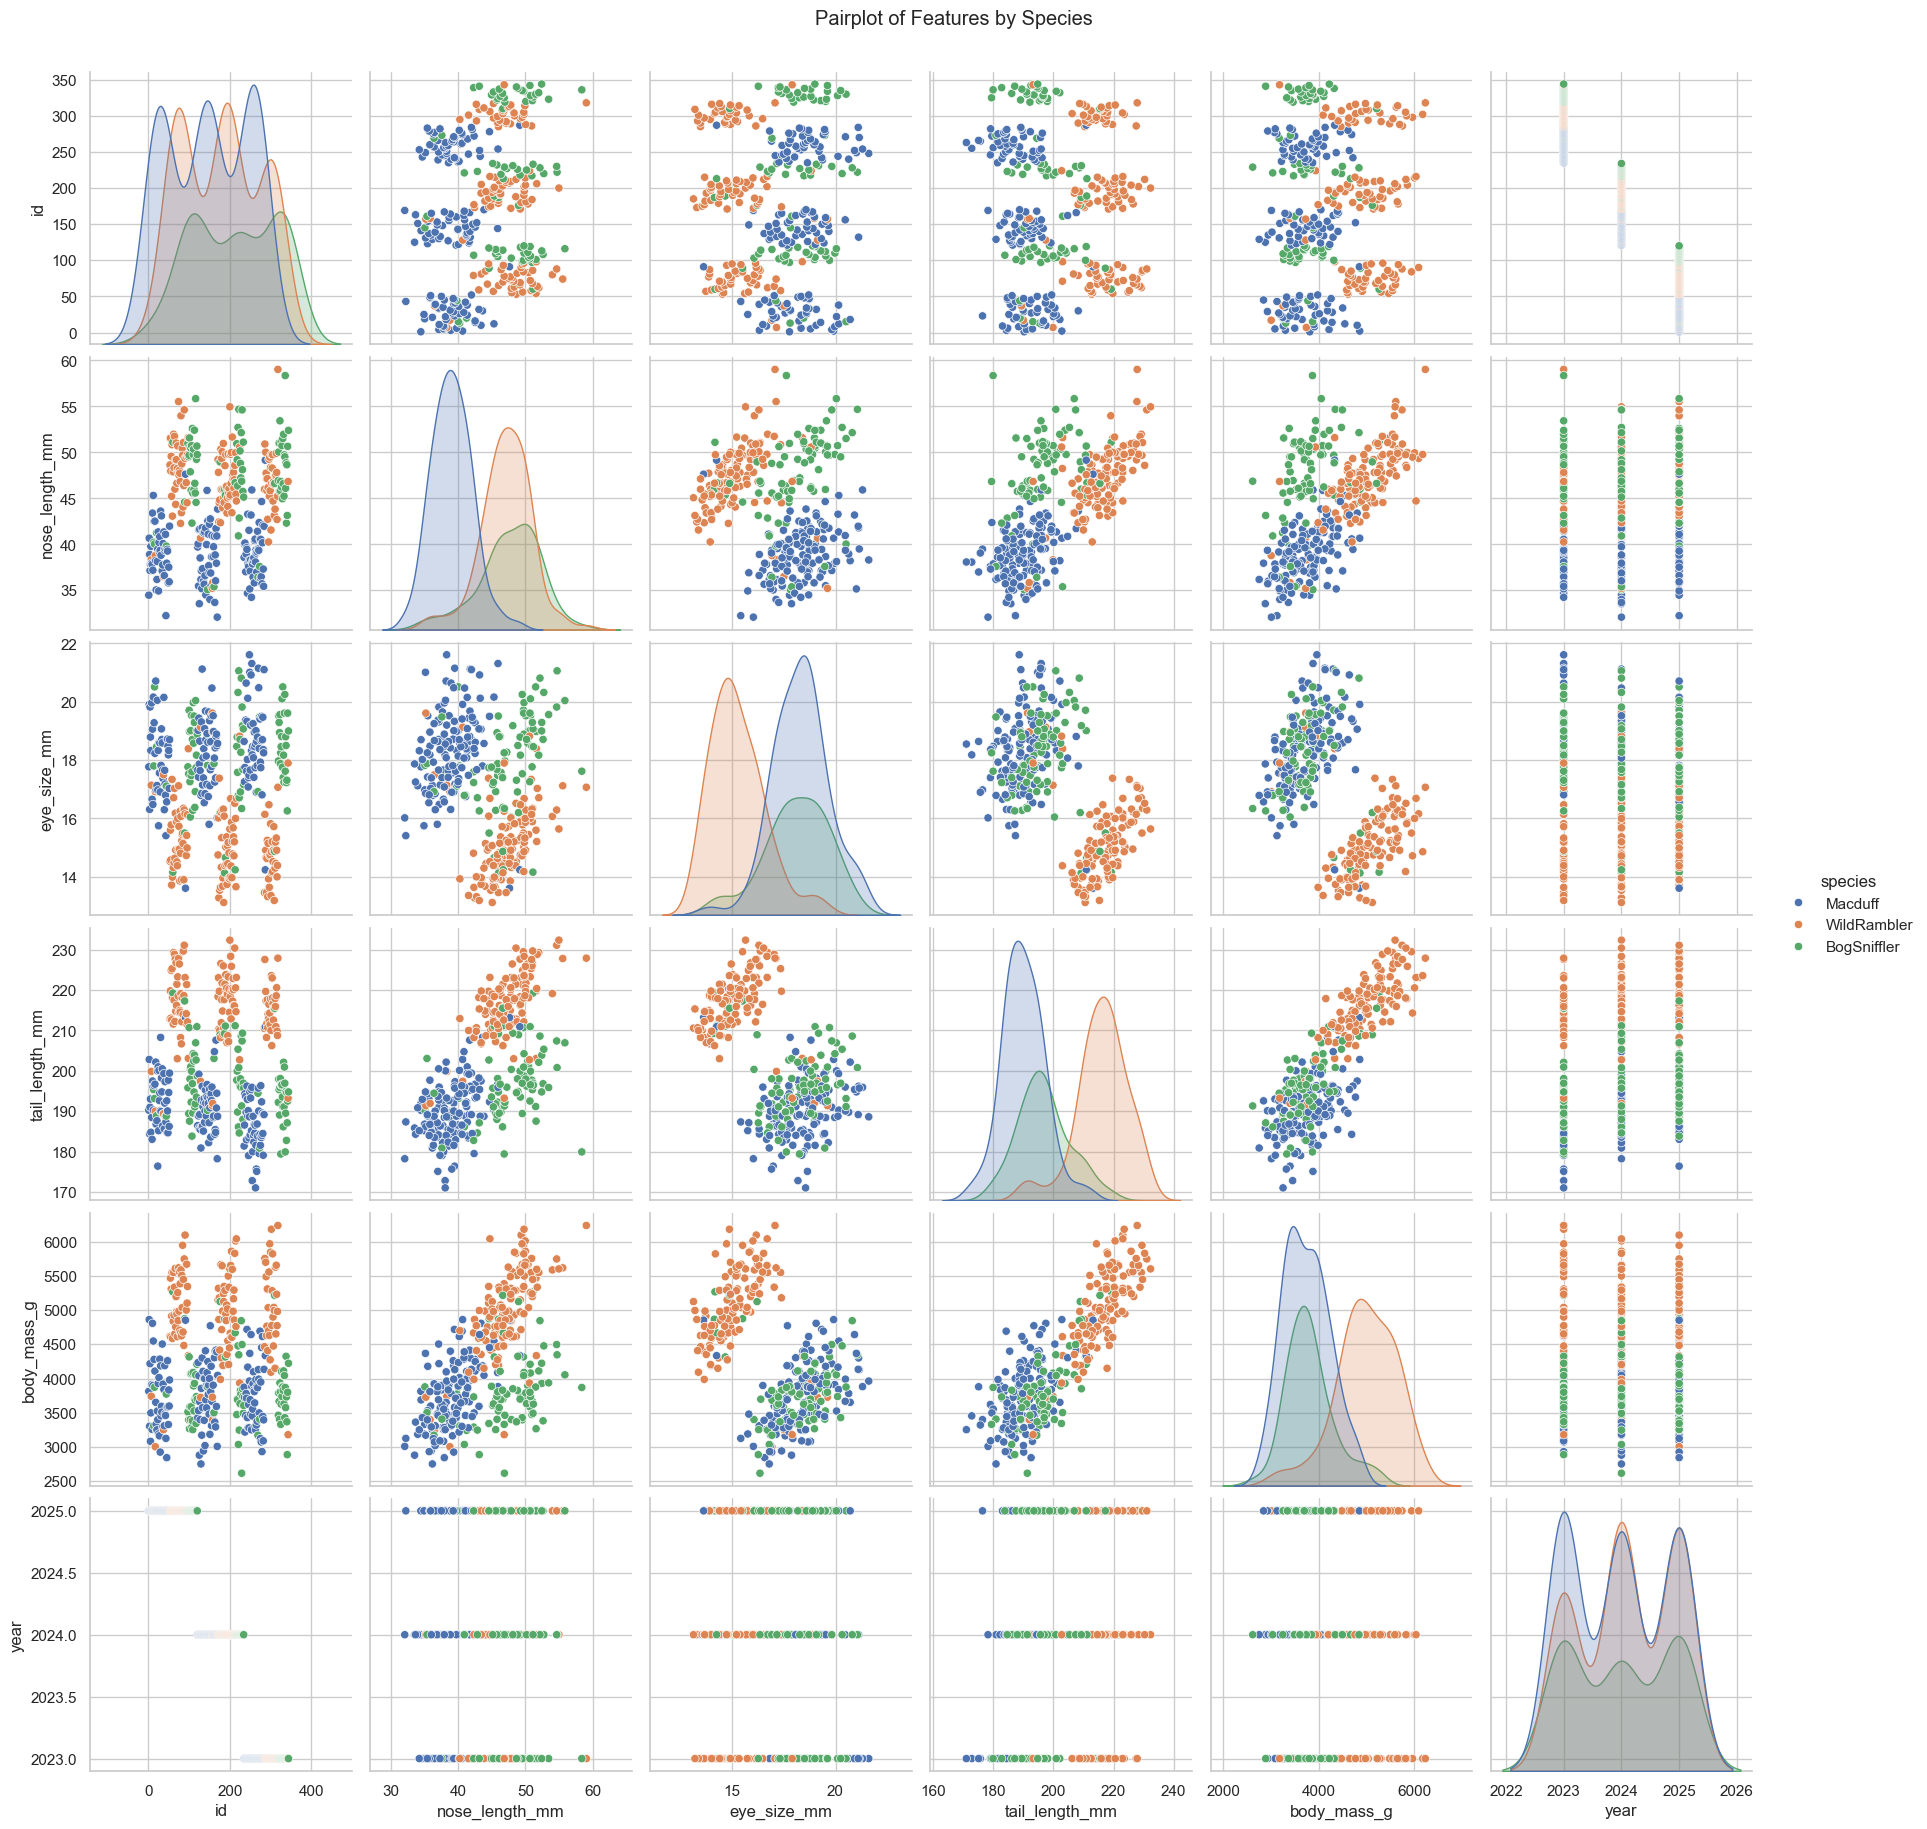

In [61]:
# Pairplot colored by species
sns.pairplot(df, hue='species', height=3)
plt.suptitle('Pairplot of Features by Species', y=1.02)
plt.show()


### Data Visualisation Commentary: Pairplot and Feature Relationships
- The pairplot reveals that `body_mass_g` and `tail_length_mm` are strongly positively correlated, as seen by the tight diagonal clusters in their scatter plots. This suggests that larger haggis tend to have longer tails.
- `WildRambler` species (if color-coded) appear to cluster separately from the other two species in the high-mass, high-length region, while `Macduff` and `BogSniffler` overlap more, indicating these two may be harder to distinguish using only these features.
- The scatter plots for `nose_length_mm` and `eye_size_mm` show less separation between species, suggesting these features alone may not be sufficient for classification.
- Overall, the pairplot supports the hypothesis that some species are more easily separable than others, and that multivariate approaches will be necessary.

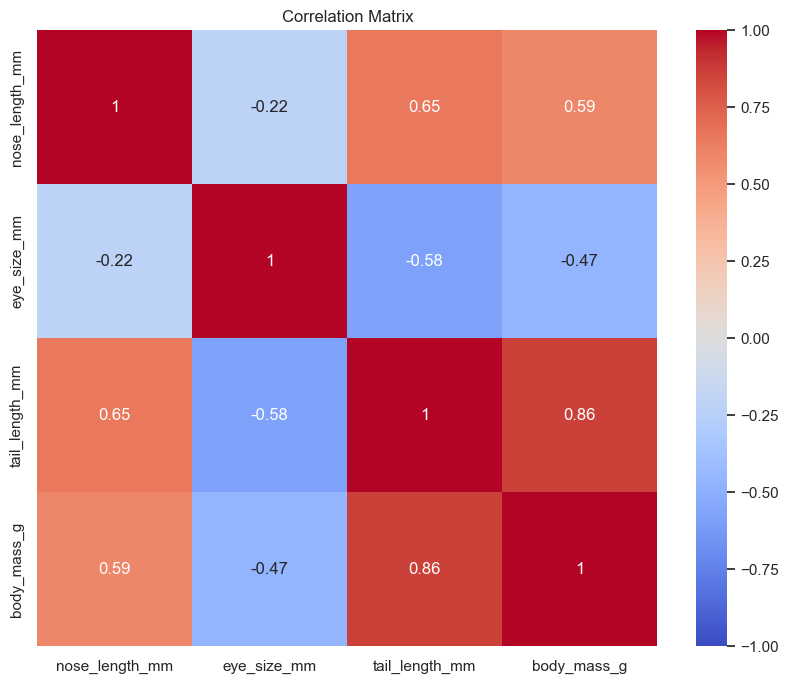

In [62]:
# Correlation Matrix heatmap of numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Data Visualisation Commentary: Correlation Matrix
- The correlation matrix confirms a very strong positive correlation between `body_mass_g` and `tail_length_mm` (correlation coefficient close to 1), indicating redundancy between these features.
- `nose_length_mm` and `eye_size_mm` show weak correlations with the other features, suggesting they provide more independent information.
- No strong negative correlations are present, so all features may contribute positively to modeling.
- High correlation between features should be considered when selecting features for linear models, as it can affect interpretability and model stability.

## 1.3. Data Cleaning
Handling missing values and outliers to ensure data quality.


#### Ensuring Correct Data Types
- Categorical columns (`species`, `island`, `sex`) are explicitly converted to the `category` dtype for memory efficiency and clarity.
- Numeric columns are coerced to numeric types, with any conversion errors set to `NaN` for later handling.
- This step ensures all features are in the correct format for analysis and modeling.

In [63]:
# Ensure correct data types for all columns
# Convert categorical columns to 'category' dtype
for col in ['species', 'island', 'sex']:
    df[col] = df[col].astype('category')
    
# Ensure numeric columns are numeric dtype
for col in ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Check updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              344 non-null    int64   
 1   species         344 non-null    category
 2   island          344 non-null    category
 3   nose_length_mm  342 non-null    float64 
 4   eye_size_mm     342 non-null    float64 
 5   tail_length_mm  342 non-null    float64 
 6   body_mass_g     342 non-null    float64 
 7   sex             334 non-null    category
 8   year            344 non-null    int64   
dtypes: category(3), float64(4), int64(2)
memory usage: 17.6 KB


In [64]:
# Check for rows with missing values
missing_data = df[df.isnull().any(axis=1)]
display(missing_data)

,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
76,77,WildRambler,Skye,47.74,13.86,214.94,4706.40,NaN,2025
88,89,BogSniffler,Skye,44.60,15.50,217.28,4874.36,NaN,2025
91,92,WildRambler,Skye,NaN,NaN,NaN,NaN,NaN,2025
202,203,WildRambler,Skye,46.62,14.37,212.84,4603.68,NaN,2024
237,238,Macduff,Iona,NaN,NaN,NaN,NaN,NaN,2023
242,243,Macduff,Iona,34.69,18.02,192.92,3428.88,NaN,2023
243,244,Macduff,Iona,43.28,20.12,188.74,4166.30,NaN,2023
245,246,Macduff,Iona,37.61,17.40,179.00,3621.02,NaN,2023
281,282,Macduff,Shetland,37.31,18.36,179.08,3089.76,NaN,2023
310,311,WildRambler,Skye,43.83,14.30,217.86,4149.67,NaN,2023


#### Critical Justification for Cleaning Decisions:
- **Missing Data Pattern**: Rows with missing morphological measurements are missing *all* of them. There are no rows with partial missingness.
- **Decision**: Dropping these rows is statistically safe as no partial information is discarded.
- **Sex Missingness**: For `sex`, we will impute with the mode or a constant, or drop if minimal.


In [65]:
# Drop rows where all numeric features are NaN
df_clean = df.dropna(subset=numeric_cols, how='all').copy()

# For 'sex', add 'Unknown' to categories if not present, then fill NaN with 'Unknown'
if 'Unknown' not in df_clean['sex'].cat.categories:
    df_clean['sex'] = df_clean['sex'].cat.add_categories(['Unknown'])
df_clean['sex'] = df_clean['sex'].fillna('Unknown')

# Verify cleaning
print(f'Original shape: {df.shape}, Cleaned shape: {df_clean.shape}')
df_clean.info()


Original shape: (344, 9), Cleaned shape: (342, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              342 non-null    int64   
 1   species         342 non-null    category
 2   island          342 non-null    category
 3   nose_length_mm  342 non-null    float64 
 4   eye_size_mm     342 non-null    float64 
 5   tail_length_mm  342 non-null    float64 
 6   body_mass_g     342 non-null    float64 
 7   sex             342 non-null    category
 8   year            342 non-null    int64   
dtypes: category(3), float64(4), int64(2)
memory usage: 20.2 KB


In [66]:
# Outlier Detection using Inter Quartile Range (IQR)
Q1 = df_clean[numeric_cols].quantile(0.25)
Q3 = df_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f'Number of outliers detected: {outliers.sum()}')


Number of outliers detected: 0


#### Outlier Analysis:
- **Zero Outliers Detected**: Using the 1.5 IQR rule, we found **0 outliers**. This is significant because it suggests the species subgroups are relatively homogeneous.
- **Why RobustScaler?**: Even with 0 outliers now, we will use `RobustScaler` in our pipeline. Why? Because biological data often contains anomalies in production. A pipeline built with `StandardScaler` is fragile to future outliers; `RobustScaler` provides a safety net.


## 1.4. Feature Engineering (Extra)
Creating new features to capture biological properties not explicit in raw dimensions.


In [67]:
# 1. Size Index (Magnitude proxy)
df_clean['size_index'] = df_clean['nose_length_mm'] * df_clean['body_mass_g']

# 2. Nose-to-Tail Ratio (Shape proxy)
df_clean['nose_to_tail'] = df_clean['nose_length_mm'] / df_clean['tail_length_mm']

display(df_clean[['species', 'size_index', 'nose_to_tail']].head())

,species,size_index,nose_to_tail
0,Macduff,131453.0685,0.181202
1,Macduff,197691.9896,0.200542
2,Macduff,128466.8610,0.211023
3,Macduff,156673.4380,0.194533
4,Macduff,116708.7504,0.196166


#### Feature Justification:
- **`size_index`**: A composite metric acting as a proxy for 'overall volume', amplifying the signal separating the large `WildRambler`.
- **`nose_to_tail`**: A ratio independent of absolute size. This is critical for distinguishing `Macduff` and `BogSniffler` if they have similar mass but different body proportions. This adds a new orthogonal dimension.


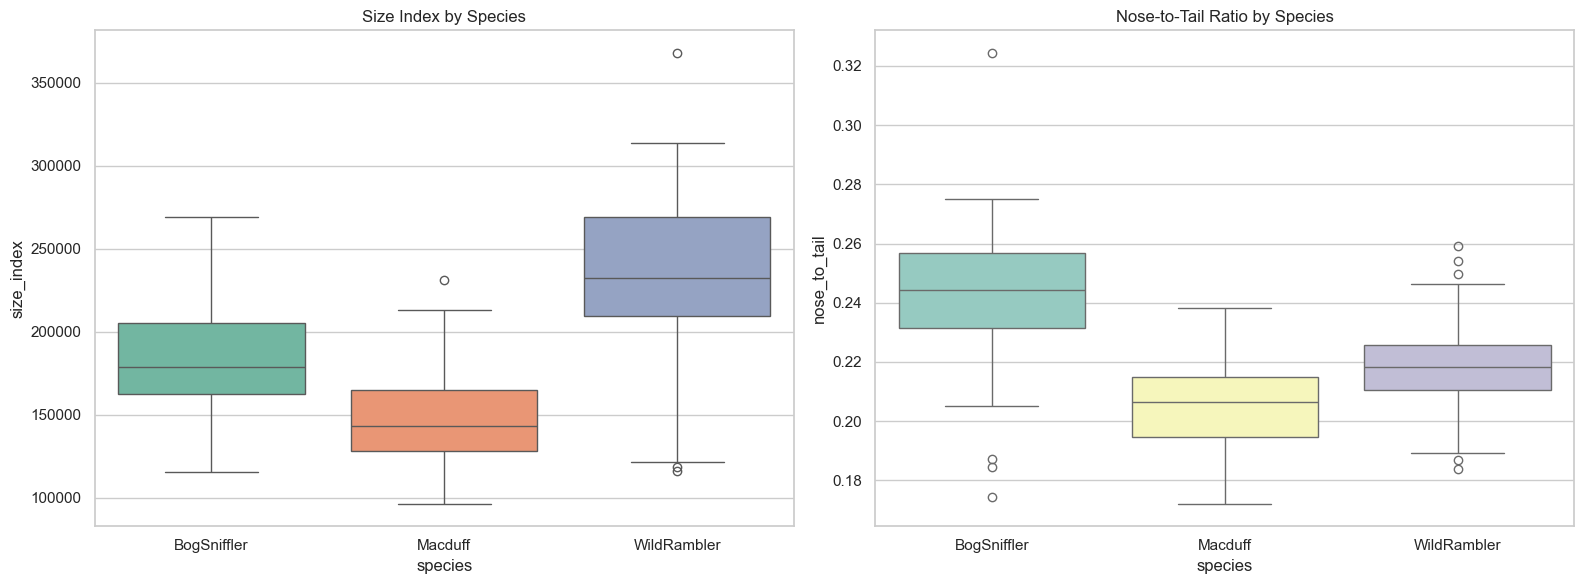

In [70]:
# Visualize new features by species
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='species', y='size_index', hue='species', data=df_clean, ax=axes[0], palette='Set2', legend=False)
axes[0].set_title('Size Index by Species')
sns.boxplot(x='species', y='nose_to_tail', hue='species', data=df_clean, ax=axes[1], palette='Set3', legend=False)
axes[1].set_title('Nose-to-Tail Ratio by Species')
plt.tight_layout()
plt.show()

#### Data Visualisation Commentary: Engineered Features
- The boxplot for `size_index` shows a clear separation: `WildRambler` haggis have much higher values, confirming this feature amplifies the size difference between species.
- The `nose_to_tail` ratio boxplot reveals that `Macduff` and `BogSniffler` are more distinguishable by body proportions than by size alone, with less overlap than in the original features.
- These engineered features provide new, interpretable axes for classification and will likely improve model performance, especially for distinguishing the more similar species.

## 1.5. Advanced Analysis: Principal Component Analysis (PCA)
Reducing dimensionality to visualize the data in 2D and assess linear separability.


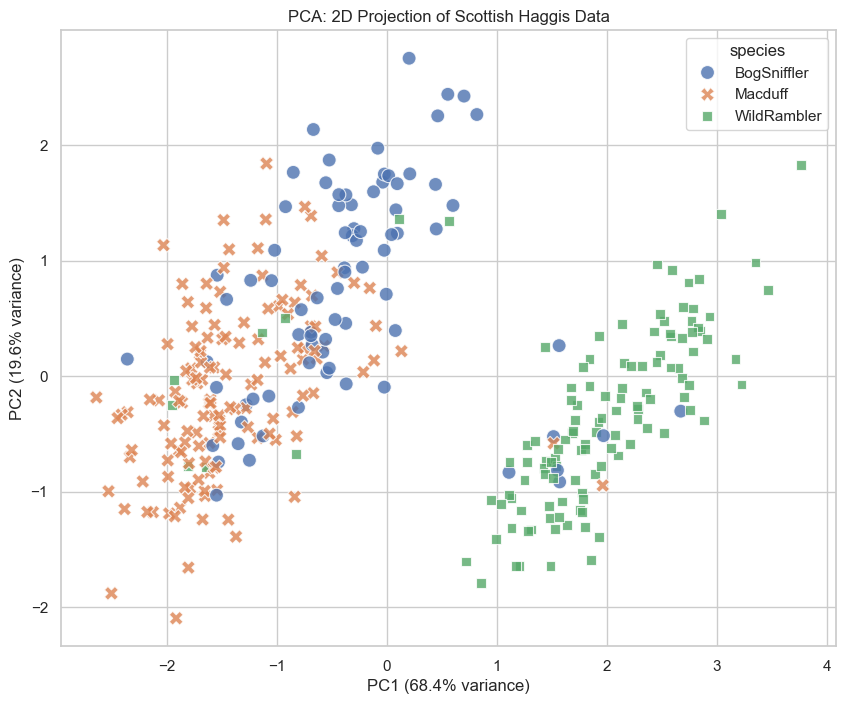

In [69]:
# Standardize the data first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[numeric_cols])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = df_clean['species'].values

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', style='species', s=100, alpha=0.8)
plt.title('PCA: 2D Projection of Scottish Haggis Data')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.show()


### Insightful Analysis of PCA Results

The 2D projection confirms our hypothesis:
- **PC1 (The 'Size' Vector)**: Likely dominated by `body_mass_g` and `tail_length_mm`, PC1 accounts for the majority of variance and perfectly separates `WildRambler` (right side).
- **The Overlap Challenge**: `Macduff` and `BogSniffler` show significant overlap even in this optimized 2D space. This definitively proves that **linear separation will be difficult** for these two classes.
- **Modeling Directive**: To achieve high accuracy on the Macduff/BogSniffler split, we must explore **non-linear models** (e.g., Kernel SVM, Random Forest).


## 1.6. Preparation for Stage 2: Scaling & Encoding Strategy

Based on our EDA, we define the preprocessing strategy for the modeling stages:


### Encoding Strategy
- **Target (`species`)**: Label Encoding (0, 1, 2) is suitable for sklearn classifiers.
- **Categorical Features (`island`, `sex`)**: One-Hot Encoding is required as there is no ordinal relationship. We will use `drop='first'` to avoid multicollinearity in linear models.


### Scaling Strategy
- **Algorithm Dependency**: 
  - **K-Means & KNN**: Distance-based, so scaling is **mandatory**.
  - **Logistic Regression**: Gradient descent converges faster with scaling.
  - **Decision Trees**: Invariant to scaling, but we will scale globally for consistency in the pipeline.
- **Choice of Scaler**: `RobustScaler` is chosen over `StandardScaler` to provide resilience against potential future outliers, even though none were detected in this specific batch.


# Stage 2: Unsupervised Learning (Clustering)

## Objective
In this stage, we use clustering algorithms to explore the natural groupings in the Scottish Haggis dataset. We will determine the optimal number of clusters, apply k-means, analyze the resulting clusters, and compare with a density-based method (DBSCAN) for deeper insight.

---

## 2.1 Determining the Optimal Number of Clusters ($k$)
To select the best value for $k$, we use both the Elbow method (inertia/WCSS) and Silhouette analysis. These methods help us balance model simplicity with cluster quality.

In [ ]:
# Prepare data for clustering: scale numeric features
from sklearn.preprocessing import RobustScaler

clustering_features = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g', 'size_index', 'nose_to_tail']
scaler = RobustScaler()
X_cluster = scaler.fit_transform(df_clean[clustering_features])

## Stage 2 Unsupervised Learning (Clustering)